In [85]:
import tensorflow as tf
from tensorflow.keras.optimizers  import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Data Source

You can download Data from this link https://www.kaggle.com/datasets/sanikamal/rock-paper-scissors-dataset

# Importing Data

In [86]:
import os

base_dir = r'C:\Users\alifs\Downloads\archive\Rock-Paper-Scissors'
train_dir = os.path.join(base_dir, 'train')


# List Category

In [87]:
os.listdir(train_dir)

['paper', 'rock', 'scissors']

# Creating Directory 

In [88]:
train_rock_dir = os.path.join(train_dir, "rock")
train_paper_dir = os.path.join(train_dir, "paper")
train_scissors_dir = os.path.join(train_dir, "scissors")

# Creating Image Object 

In [89]:
datagen = ImageDataGenerator(
           validation_split = 0.4,
           rescale=1./255,
           rotation_range=20,
           horizontal_flip=True,
           shear_range = 0.2,
           fill_mode = 'nearest',
          )

In [90]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 

In [91]:
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [92]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

Found 1512 images belonging to 3 classes.


In [93]:
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

Found 1008 images belonging to 3 classes.


# Building Model CNN

In [100]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape = (150, 150, 3)),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [101]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.95 and logs.get('val_acc') > 0.95):
              self.model.stop_training = True
        else:
              self.model.stop_training = False


In [102]:
custom_cb = CustomCallback()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['acc'])

# Training Data

In [103]:
history=model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=15,
      validation_data=val_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,callbacks=[custom_cb])

Epoch 1/15
25/25 - 5s - loss: 1.1126 - acc: 0.4075 - val_loss: 1.0133 - val_acc: 0.5625 - 5s/epoch - 215ms/step
Epoch 2/15
25/25 - 4s - loss: 0.6835 - acc: 0.7088 - val_loss: 0.4414 - val_acc: 0.7937 - 4s/epoch - 176ms/step
Epoch 3/15
25/25 - 5s - loss: 0.2233 - acc: 0.9312 - val_loss: 0.5971 - val_acc: 0.7437 - 5s/epoch - 182ms/step
Epoch 4/15
25/25 - 5s - loss: 0.0713 - acc: 0.9737 - val_loss: 0.4330 - val_acc: 0.8375 - 5s/epoch - 181ms/step
Epoch 5/15
25/25 - 5s - loss: 0.0525 - acc: 0.9807 - val_loss: 0.4325 - val_acc: 0.9000 - 5s/epoch - 182ms/step
Epoch 6/15
25/25 - 5s - loss: 0.0968 - acc: 0.9678 - val_loss: 0.3994 - val_acc: 0.8375 - 5s/epoch - 182ms/step
Epoch 7/15
25/25 - 4s - loss: 0.0410 - acc: 0.9910 - val_loss: 0.2561 - val_acc: 0.9563 - 4s/epoch - 176ms/step


# Plotting Accuracy and Loss

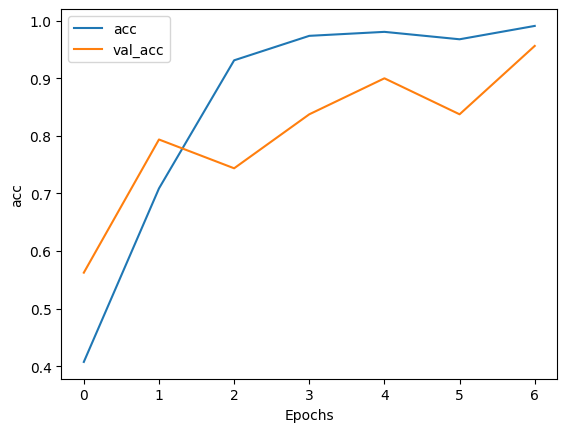

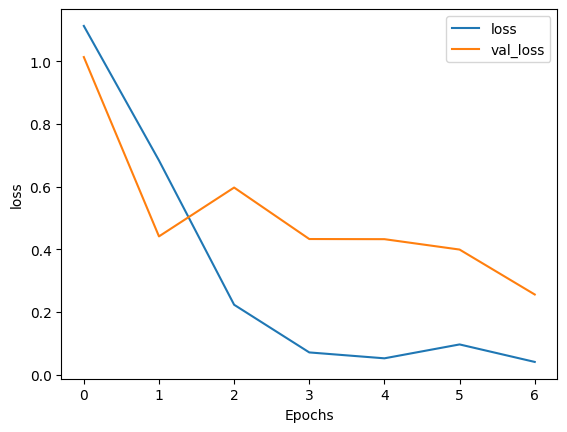

In [104]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
# Plot the accuracy and loss
plot_graphs(history, "acc")
plot_graphs(history, "loss")

# Saving Model

In [105]:
model.save('model_C4.h5')

In [106]:
from keras.models import load_model
model = load_model('model_C4.h5')

# Predicting New Image

In [107]:
def pred(path):
    image = tf.keras.preprocessing.image.load_img(path,target_size=(150, 150))
    input_arr = numpydata = np.array(image)
    x = np.expand_dims(input_arr, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    imgplot = plt.imshow(image)
    plt.show()
    if classes[0][0] == 1 :
         print("Paper")
    elif classes[0][1] == 1 :
         print("Rock")
    elif classes[0][2] == 1 :
         print("Scissors")
    return path

1/1 [==============================] - 0s 60ms/step


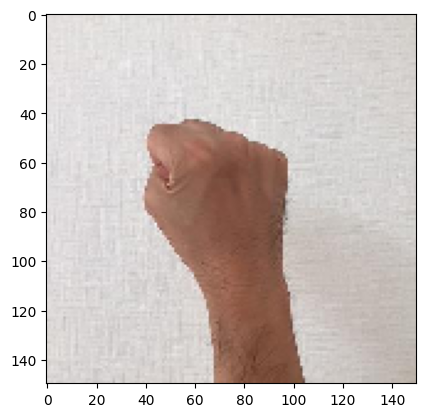

Rock


'batu.jpg'

In [108]:
preds('batu.jpg')

1/1 [==============================] - 0s 18ms/step


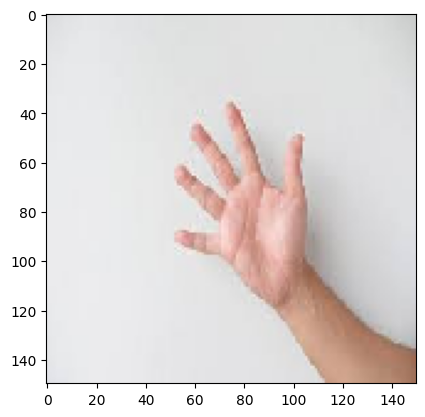

Paper


'paper.jfif'

In [109]:
pred('paper.jfif')

1/1 [==============================] - 0s 17ms/step


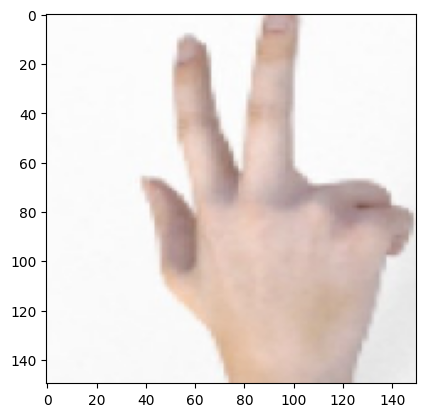

Scissors


'sci.jpg'

In [115]:
pred('sci.jpg')